### Import Libraries

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [2]:
# dataframes creation for both training and testing datasets 

fashion_train_df = pd.read_csv('fashion-mnist_train.csv', sep = ',')
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

# Visualization of dataset

In [3]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [7]:
fashion_train_df.shape

(60000, 785)

In [8]:
# Create training and testing arrays

training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype='float32')

In [9]:
training.shape

(60000, 785)

In [10]:
type(training)

numpy.ndarray

In [11]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
testing.shape

(10000, 785)

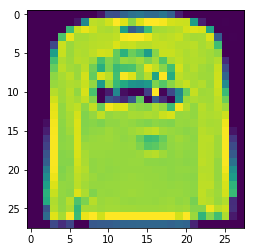

In [13]:
# Let's view some images!

i = random.randint(1, 60000) # select any random index from 1 to 60,000
plt.imshow(training[i,1:].reshape((28, 28))) # reshape and plot the image

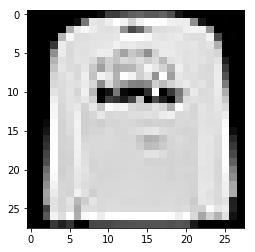

In [14]:
plt.imshow(training[i,1:].reshape((28, 28)), cmap = 'gray') # reshape and plot the image
# Plot first sample of X_train
# plt.imshow(X_train[0], cmap = 'gray')

In [15]:
label = training[i,0]
label

2.0

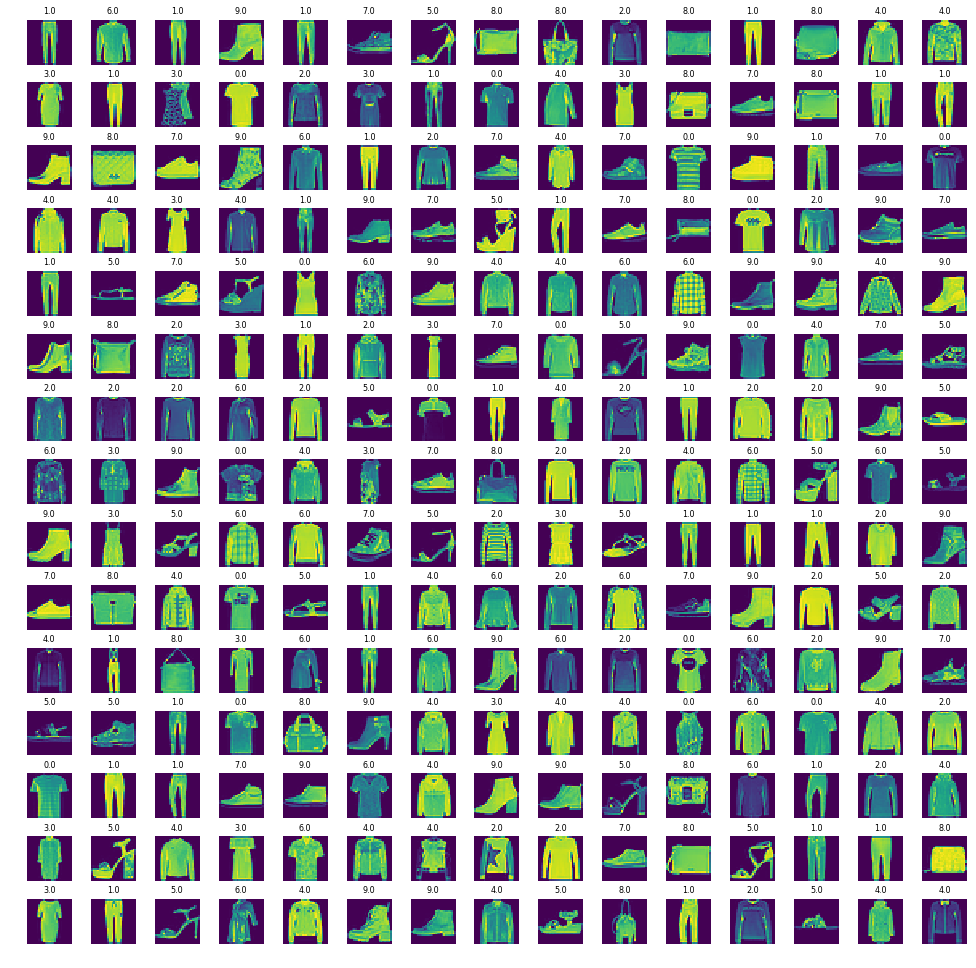

In [16]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 

W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize=(17,17))

axes = axes.ravel()

n_training = len(training)

for i in np.arange(0, W_grid*L_grid):
    
    index = np.random.randint(0, n_training)
    
    axes[i].imshow(training[index,1:].reshape(28,28))
    axes[i].set_title(training[index,0], fontsize=8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

# Training the Model

In [17]:
# Prepare the training and testing dataset 
X_train = training[:,1:]/255
y_train = training[:,0]
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [19]:
X_train.shape

(48000, 784)

In [20]:
y_train.shape

(48000,)

In [21]:
# * unpack the tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [22]:
X_train.shape

(48000, 28, 28, 1)

In [23]:
X_test.shape

(10000, 28, 28, 1)

In [24]:
X_validate.shape

(12000, 28, 28, 1)

### CNN Model

In [25]:
import keras # open source Neural network library madke our life much easier

# y_train = keras.utils.to_categorical(y_train, 10)
# y_test = keras.utils.to_categorical(y_test, 10)

Using TensorFlow backend.


In [26]:
# Import train_test_split from scikit library
# Import Keras
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [27]:
cnn_model = Sequential()
# Try 32 fliters first then 64
cnn_model.add(Conv2D(64,3, 3, input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))
# cnn_model.add(Conv2D(32,3, 3, activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))

In [28]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [29]:
epochs = 20

history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        nb_epoch = epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))



Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 79s 2ms/step - loss: 0.7986 - acc: 0.7262 - val_loss: 0.4873 - val_acc: 0.8228
Epoch 2/20
48000/48000 [==============================] - 96s 2ms/step - loss: 0.4447 - acc: 0.8433 - val_loss: 0.4304 - val_acc: 0.8437
Epoch 3/20
48000/48000 [==============================] - 95s 2ms/step - loss: 0.3922 - acc: 0.8636 - val_loss: 0.3674 - val_acc: 0.8731
Epoch 4/20
48000/48000 [==============================] - 106s 2ms/step - loss: 0.3635 - acc: 0.8730 - val_loss: 0.3638 - val_acc: 0.8707
Epoch 5/20
48000/48000 [==============================] - 109s 2ms/step - loss: 0.3392 - acc: 0.8802 - val_loss: 0.3403 - val_acc: 0.8783
Epoch 6/20
48000/48000 [==============================] - 82s 2ms/step - loss: 0.3234 - acc: 0.8857 - val_loss: 0.3107 - val_acc: 0.8926
Epoch 7/20
48000/48000 [==============================] - 72s 1ms/step - loss: 0.3110 - acc: 0.8907 - val_loss: 0.3106 - val_a

   # Evaluating the Model

In [30]:
cnn_model.evaluate(X_test, y_test)

10000/10000 [==============================] - 9s 881us/step


[0.2486938059568405, 0.9123]

In [31]:
# get the predictions for the test data

predicted_classes = cnn_model.predict_classes(X_test)

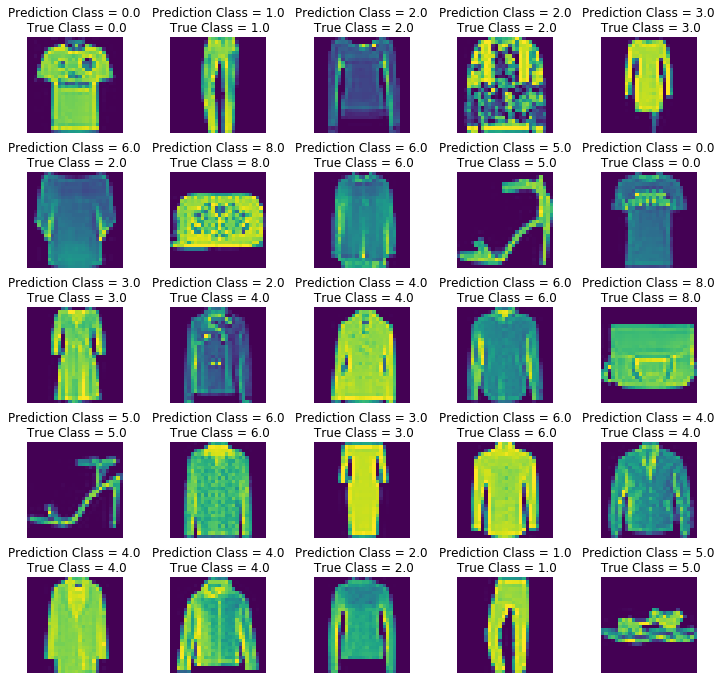

In [32]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

###### ACCURACY MIGHT INCREASE IF WE INCREASE NUMBER OF EPOCHS=50  

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
print(confusion_matrix(y_test, predicted_classes))
print('\n')
print(classification_report(y_test, predicted_classes))

[[845   1  11  20   1   0 114   2   6   0]
 [  0 987   1  11   0   0   1   0   0   0]
 [ 14   2 855  15  58   0  54   0   2   0]
 [ 13   9   5 934  17   0  22   0   0   0]
 [  1   0  36  23 888   0  52   0   0   0]
 [  0   1   0   0   0 960   0  21   2  16]
 [ 98   1  58  24  65   0 749   0   5   0]
 [  0   0   0   0   0   3   0 953   0  44]
 [  2   0   5   3   2   4   4   3 976   1]
 [  0   0   0   0   0   0   0  24   0 976]]


              precision    recall  f1-score   support

         0.0       0.87      0.84      0.86      1000
         1.0       0.99      0.99      0.99      1000
         2.0       0.88      0.85      0.87      1000
         3.0       0.91      0.93      0.92      1000
         4.0       0.86      0.89      0.87      1000
         5.0       0.99      0.96      0.98      1000
         6.0       0.75      0.75      0.75      1000
         7.0       0.95      0.95      0.95      1000
         8.0       0.98      0.98      0.98      1000
         9.0       0.94   